In [1]:
# Importing neccesary packages
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#Defining functions to change position and velocities SHO for a mass on a spring:
'''The idea is to define functions to change the variables of velocity and position according to
    the equations of motion for an undamped oscillator. This is a first order method, with a lot of
    space for optimisation
    '''

def initial_conditions(x,v):
    """This function sets the initial conditions for the differential equation
    Args:
        x (_float64_): _This is the x-coordinate where we release the mass from_
        v (_float 64_): _This is the initial velocity, should set to zero?_

    Returns:
        _list_: _Returns a list containing the initial position and velocity_
    """
    initial_position = x
    initial_velocity = v
    return [initial_position, initial_velocity]

def velocity_changes(position, delta, m, k):
    """_This function determines the change in velocity for a given time interval delta, using
      Newtons second law of motion_

    Args:
        position (_float64_): _The position the mass is before the velocity change has been made_
        delta (_float64_): _The time interval between succesive iterations, the smaller the better_
        m (_float64_): _The mass of the mass_
        k (_float64_): _The spring constant_

    Returns:
        _float64_: _Returns the change in velocity_
    """
    del_v = -k*position*delta/m
    return del_v

def position_changes(delta, del_v):
    """_This function computes the change in the position, given the time interval between 
        iterations and changes in velocity_

    Args:
        delta (_float64): _The time interval between succesive iterations, the smaller the better_
        del_v (_float64_): _The change in velocity during one iteration_

    Returns:
        _floatr 64_: _The change in position between iterations_
    """
    del_x = delta*del_v
    return del_x
 

In [20]:
# Creating the loop to iterate through positions and velocities


def positions(x0, v0, num_of_iterations, delta, m, k):
    """_This function is is the loop that creates the list of positions and velocities, given the 
        the functions that change the variables. Remark: This should work regardless of the method
        that is used to find the new variables_

    Args:
        x0 (_float64_): _Initial condition for position_
        v0 (_float64_): _Initial condition for velocity_
        num_of_iterations (_float64_): _How many iterations we want to cycle through_
        delta (_float64_): _Time interval between succesive iterations
        m (_float64_): _Mass of object_
        k (_float64_): _Spring constant _

    Returns:
        _type_: _The function returns the list of velocities, positions and the time passed during
                the simulation._
    """

    time = list(np.arange(0, delta*(num_of_iterations+2), delta))
    initial_conds = initial_conditions(x0, v0)
    list_of_positions = [initial_conds[0]]
    list_of_velocities = [initial_conds[1]]
    list_of_positions.append(initial_conds[0] + delta * initial_conds[1])
    for i in range(0, num_of_iterations+1):
        list_of_velocities.append(list_of_velocities[i] + velocity_changes(list_of_positions[i+1],
                                                                           delta, m, k))
        list_of_positions.append(
            list_of_positions[i] + list_of_velocities[i+1] * delta)
    return list_of_velocities, list_of_positions[:-1], time


'_The function was found to work as expected given that delta is small enough. Otherwise the \n    drop is noticable, as the force on the object is underestimated, and this error propagates._\n    '

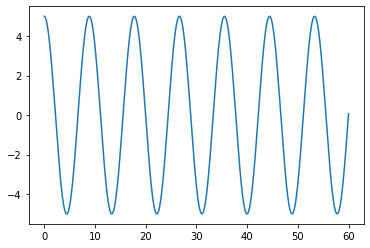

In [ ]:
# Testing the function
trial = positions(5, 0, 600000, 0.0001, 1, 1)
plt.plot(trial[2], trial[1])
"""_The function was found to work as expected given that delta is small enough. Otherwise the 
    drop is noticable, as the force on the object is underestimated, and this error propagates._
    """


In [43]:
# doing some iterations to test different m & k values

class iterating:
    ''' This class is used to either:
    - plot specific values of m and k, or
    - iterate through different values of m and k & polt'''
    
    def __init__(self):
        print('use set_conditions command to use this class')

    
    def set_conditions(self, x0, v0, num_of_iterations, delta):
        self.x0 = x0
        self.v0 = v0
        self.num_of_iterations = num_of_iterations
        self.delta = delta

        
    def run(self, k, m, iterate = False):
        
        if iterate:
            ''' 
            used when want to iterate through different values of m and k
            m & k should be lists of values
            '''
            
            if len(m) != len(k):
                ''' checking that m and k are of the same length
                if not, raise an exception '''
                
                raise Exception('m and k must be of the same length')
            
            
            self.results = []
            
            '''    
            going through each pair of values of m and k and storing results in self.results
            
            storing as a big list where each element is [i, k, m, [velocities, positions, time]]
            where:
            i = index of the pair of values
            k = spring constant
            m = mass
            velocities = list of velocities produced by that pair of values
            positions = list of positions produced by that pair of values
            time = list of time values produced by that pair of values
            
            '''
            for k_value, m_value, i in zip(k, m , range(len(k))):

                result = positions(self.x0, self.v0, self.num_of_iterations, self.delta, m_value, k_value)
                self.results.append([i, k_value, m_value, result])
                
                
            # plotting all the results in 2 graphs, one for position and one for velocity
            plt.title("Position vs time")
            for i in range(len(self.results)):
                plt.plot(self.results[i][3][2], self.results[i][3][1], label = 'k = ' + str(self.results[i][1]) + ' m = ' + str(self.results[i][2]))
            plt.xlabel('time')
            plt.ylabel('position')
            plt.legend()
            plt.show()
            
            plt.title("Velocity vs time")
            for i in range(len(self.results)):
                plt.plot(self.results[i][3][2], self.results[i][3][0], label = 'k = ' + str(self.results[i][1]) + ' m = ' + str(self.results[i][2]))
            plt.xlabel('time')
            plt.ylabel('velocity')
            plt.legend() 
            plt.show()
                
                
        else:
            ''' used when want to test a specific pair of values of m and k
            m & k should be floats'''
            
        
            self.results = positions(self.x0, self.v0, self.num_of_iterations, self.delta, m, k)
            
            # plotting the results in 2 graphs, one for position and one for velocity
            plt.title("Position vs time")
            plt.plot(self.results[2], self.results[1],label = 'k = ' + str(k) + ' m = ' + str(m))
            plt.xlabel('time')
            plt.ylabel('position')
            plt.legend() 
            plt.show()
            
            plt.title("Velocity vs time")
            plt.plot(self.results[2], self.results[0], label = 'k = ' + str(k) + ' m = ' + str(m))
            plt.xlabel('time')
            plt.ylabel('velocity')
            plt.legend() 
            plt.show()

    

In [44]:
# creating an instance of the class
test = iterating()

use set_conditions command to use this class


In [45]:
#setting the simulation conditions
test.set_conditions(5, 0, 60000, 0.001)

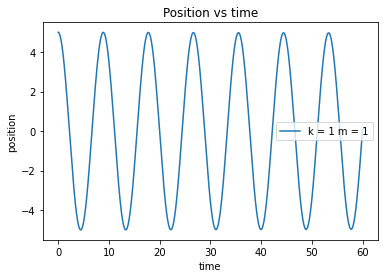

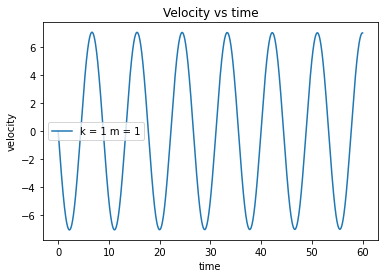

In [46]:
# running the simulation for a single pair of values of m and k
test.run(1, 1)

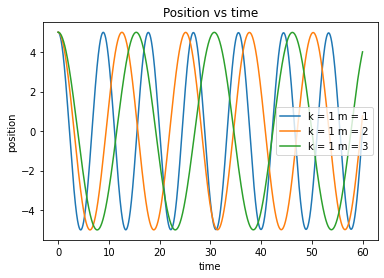

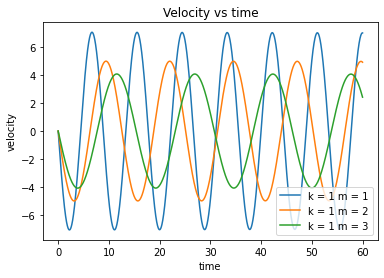

In [47]:
# running the simulation for a list of values of m and k
test.run([1, 1, 1], [1, 2, 3], iterate = True)